![picture](https://doc.google.com/uc?id=1-SCmtVCHxEXXpBfRMwvY_gBrDFA6Pb3u)

# Cat Classification with Tensorflow 2.0 

# Training Notebook

## Level: Beginner

In this short hands-on activity, you will build a simple cat neural network classifier with Tensorlow 2.0

1. Build a neural network that classifies cat images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

## Note ##
The dataset used is provided by this kaggle repository https://www.kaggle.com/tongpython/cat-and-dog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries ##

In [ ]:
#import tensorflow
import tensorflow as tf
#check the version of tensorflow, make sure it version 2.0 and above
print (tf.__version__)

2.7.0


In [ ]:
#import pillow
from PIL import Image
from random import shuffle, choice
#import numpy arrays libraries
import numpy as np
#import operating system library
import os

#import keras and its libraries
from tensorflow.keras import datasets, layers, models

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Then, we import some other libraries including:

* __PIL__ is the Python Imaging Library (abbreviated as PIL) (in newer versions known as Pillow) is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. It is available for Windows, Mac OS X and Linux

* the module __random__ implements pseudo-random number generators for various distributions

* the __numpy__ module is for numpy array manpiulation 

* the __os__ module is the Operating System module and allows to have access to folders and files stored in the hard drive, like for example accessing the images of the dataset

* __tensorflow.keras__, this is the module of keras in tensorflow, which will be used to build our neural network model in a very easy manner

## One-Hot Encoding ##

In [ ]:
IMAGE_SIZE = 256

def one_hot_encode(class_name):
    if class_name == 'cats': return np.array([1, 0])
    elif class_name == 'notcats' : return np.array([0, 1])



Now, we set the size of our image to 256 by 256 pixels. Note that our training and test images may have different and various sizes. However, this size means that we will resize all the images to be 256 by 256 pixels.  Remember that the input size of a neural network is fixed, and in our case, it is 256x256=65536 pixels.

The method __one_hot_encode(name)__ take a string as a parameter, and create a label to the image. Note that the label for cat is the numpy array [1,0] and the label for not cat is [0,1]. This technique is a very common technique in machine learning is known as the __one-hot encoding__.
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. You can read more about one-hot encoding in this link https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee

Let us test this function

In [ ]:
print('cats->',one_hot_encode('cats'))

cats-> [1 0]


In [ ]:
print('notcats->',one_hot_encode('notcats'))

notcats-> [0 1]


So, [1 0] array refers to a cat class, and [0 1] refers to a non-cat class

## Loading the training data ##

In [ ]:
IMAGE_DIRECTORY = './drive/MyDrive/cat-dog/dataset/training_set'
def load_data(IMAGE_DIRECTORY, number_of_images=100,shuffle_data=True):
    print("Loading images...")
    train_data = []
    folders = next(os.walk(IMAGE_DIRECTORY))[1]

    for folder_name in folders:
        print("Loading {0}".format(folder_name))
        file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, folder_name)))[2]

        for i in range(number_of_images):
            image_name = choice(file_names)
            image_path = os.path.join(IMAGE_DIRECTORY, folder_name, image_name)
            #print(image_path)
            label = one_hot_encode(folder_name)
            class_name=folder_name
            if "DS_Store" not in image_path:
                img = Image.open(image_path)
                img = img.convert('L')
                img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
                train_data.append([np.array(img), label,class_name])
    
    if (shuffle_data==True):
        shuffle(train_data)
    print('we loaded ',len(train_data),'images in the training dataset')
    return train_data

The function __load_data__ is responsible for loading the training dataset. First, we set the IMAGE_DIRECTORY valriable to './data/training_set', which refers to the training dataset. 

The training data will be loaded into the list __train_data__. Initially, the list of empty. 
Then, the variale directories will get the tree structure of all directories in the specified path. 

__os.walk()__ generates the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).

* root : Prints out directories only from what you specified.
* dirs : Prints out sub-directories from root.
* files : Prints out all files from root and directories.

Let us try to see the effect of OS.walk()

In [ ]:
PROJECT_PATH='/content/drive/MyDrive/cat-dog/'
IMAGE_DIRECTORY = PROJECT_PATH+'dataset/training_set/' #or data/training_set
print("os.walk(IMAGE_DIRECTORY)", os.walk(IMAGE_DIRECTORY))

#print("os.walk(IMAGE_DIRECTORY)", next(os.walk(IMAGE_DIRECTORY))[0])
#print(next(os.walk(IMAGE_DIRECTORY))[1])
#print(next(os.walk(IMAGE_DIRECTORY))[2])

os.walk(IMAGE_DIRECTORY) <generator object walk at 0x7fca448f8950>


In [ ]:
i=0
for root,sub_directories, files in (os.walk(IMAGE_DIRECTORY)):
    print("Level ",i)
    print("root folder:", root)
    print("sub folders:",sub_directories)
    print("number of files in the root folder:",len(files))
    i=i+1
    print('-----------------------------')
    

Level  0
root folder: /content/drive/MyDrive/cat-dog/dataset/training_set/
sub folders: ['cats', 'notcats']
number of files in the root folder: 0
-----------------------------
Level  1
root folder: /content/drive/MyDrive/cat-dog/dataset/training_set/cats
sub folders: []
number of files in the root folder: 4001
-----------------------------
Level  2
root folder: /content/drive/MyDrive/cat-dog/dataset/training_set/notcats
sub folders: []
number of files in the root folder: 1669
-----------------------------


In [ ]:
folders=next(os.walk(IMAGE_DIRECTORY))
print("paths_tuple in the current directory: \n", folders)

paths_tuple in the current directory: 
 ('/content/drive/MyDrive/cat-dog/dataset/training_set/', ['cats', 'notcats'], [])


In [ ]:
print("THE ROOT FOLDER")
print("os.walk(IMAGE_DIRECTORY)[0]: ", next(os.walk(IMAGE_DIRECTORY))[0])
print("folders[0]             : ", folders[0])

THE ROOT FOLDER
os.walk(IMAGE_DIRECTORY)[0]:  /content/drive/MyDrive/cat-dog/dataset/training_set/
folders[0]             :  /content/drive/MyDrive/cat-dog/dataset/training_set/


In [ ]:
print("THE SUBDIRECTORIES FROM THE ROOT")
print("os.walk(IMAGE_DIRECTORY)[1]: ", next(os.walk(IMAGE_DIRECTORY))[1])
print("folders[1]          : ", folders[1])

THE SUBDIRECTORIES FROM THE ROOT
os.walk(IMAGE_DIRECTORY)[1]:  ['cats', 'notcats']
folders[1]          :  ['cats', 'notcats']


In [ ]:
print("THE FILES IN THE ROOT FOLDER")

THE FILES IN THE ROOT FOLDER


In [ ]:
IMAGE_DIRECTORY = PROJECT_PATH+'dataset/training_set'
folders = next(os.walk(IMAGE_DIRECTORY))[1]
for folder_name in folders:
    print("Loading {0}".format(folder_name))

Loading cats
Loading notcats


Observe that the three contains three main levels. The root level (level 0) contains the root directory which is "./data/training_set". The second level (index = 1) corresponds to the two folders inside the root folder, namely the 'cats' folder and 'notcats' folder. The third level (index=2) corresponds to the hidden folder '.DS_Store'. 

In [ ]:
os.listdir(IMAGE_DIRECTORY)

['cats', 'notcats']

In [ ]:
! ls 


drive  sample_data


In [ ]:
! ls ./drive/MyDrive/cat-dog/dataset/training_set

cats  notcats


This is also another option on how we show the list of directories and files inside a folder.

The following instruction is responsible for getting the file names in every directory found in the tree. 
<code>
for folder_name in folders:
        print("Loading {0}".format(folder_name))
        file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, folder_name)))[2]
</code>

__dirname__ will contain the name of the directory found in the tree
__file_names__ will get the list of all files found in the directory.

<hr>

### Note ### 
OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules. This module provides a portable way of using operating system dependent functionality. os.path module is sub-module of OS module in Python used for common pathname manipulation.

__os.path.join()__ method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory seperator (‘/’) is put at the end.
If a path component represents an absolute path, then all previous components joined are discarded and joining continues from the absolute path component.
 (_reference:_ https://www.geeksforgeeks.org/python-os-path-join-method/)
 
 <hr>

To understand more the os method, please follow the illustrative code below

In [ ]:
IMAGE_DIRECTORY = PROJECT_PATH+'dataset/training_set'
training_data_directory = next(os.walk(IMAGE_DIRECTORY))[1]
print ('training_data_directory: ', training_data_directory)

training_data_directory:  ['cats', 'notcats']


In [ ]:
cats_directory= training_data_directory[0]
notcats_directory= training_data_directory[1]

print ('cats_directory: ', cats_directory)
print ('notcats_directory: ', notcats_directory)

cats_directory:  cats
notcats_directory:  notcats


In [ ]:
joit_path= os.path.join(IMAGE_DIRECTORY, cats_directory)
print('joint path: ',joit_path)
images_list = next(os.walk(joit_path))[2]
print ('number of images: ', len(images_list))
print ('image list: ',images_list)


joint path:  /content/drive/MyDrive/cat-dog/dataset/training_set/cats
number of images:  4001
image list:  ['cat.3691.jpg', 'cat.3695.jpg', 'cat.3719.jpg', 'cat.3746.jpg', 'cat.37.jpg', 'cat.3728.jpg', 'cat.3723.jpg', 'cat.3745.jpg', 'cat.3755.jpg', 'cat.3715.jpg', 'cat.3754.jpg', 'cat.374.jpg', 'cat.3704.jpg', 'cat.3748.jpg', 'cat.3709.jpg', 'cat.370.jpg', 'cat.3720.jpg', 'cat.3698.jpg', 'cat.3732.jpg', 'cat.3697.jpg', 'cat.3737.jpg', 'cat.3731.jpg', 'cat.3710.jpg', 'cat.3722.jpg', 'cat.3703.jpg', 'cat.3751.jpg', 'cat.372.jpg', 'cat.3714.jpg', 'cat.3705.jpg', 'cat.3699.jpg', 'cat.3750.jpg', 'cat.3734.jpg', 'cat.3692.jpg', 'cat.3701.jpg', 'cat.3700.jpg', 'cat.371.jpg', 'cat.3749.jpg', 'cat.3756.jpg', 'cat.3752.jpg', 'cat.3693.jpg', 'cat.373.jpg', 'cat.3736.jpg', 'cat.3702.jpg', 'cat.3739.jpg', 'cat.3729.jpg', 'cat.3718.jpg', 'cat.3708.jpg', 'cat.3742.jpg', 'cat.3753.jpg', 'cat.3733.jpg', 'cat.3711.jpg', 'cat.3712.jpg', 'cat.3744.jpg', 'cat.3727.jpg', 'cat.3721.jpg', 'cat.3740.jpg', 'ca

Finally, the code below 

<code>
for i in range(number_of_images):
        image_name = choice(file_names)
        image_path = os.path.join(IMAGE_DIRECTORY, folder_name, image_name)
        label = one_hot_encode(folder_name)
        if "DS_Store" not in image_path:
            img = Image.open(image_path)
            img = img.convert('L')
            img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
</code>

* __choice(file_names):__ returns a random item from a list, tuple, or string.
* __Image.open(image_path):__ open an image from the path specified
* __img.convert('L')__: convert image to monochrome
* __img.resize:__ resize the image to the specified size
* __ANTIALIAS__: it is a filter that ensures the best quality
* __train_data.append([np.array(img), label]):__ add the training images and their label into the list
* __np.array(img)__: cast the image into a numpy array


## Building the Neural Network Model ##

Now that we have our dataset prepare, we are ready to create neural networks. 

We will create two types of networks. One fully connected neural networks, and one convolutional neural network.

If you do not have a background on covolutional neural networks, please refer to my online YouTube lecture https://www.youtube.com/watch?v=vibHourRAEc

In [ ]:
from IPython.display import HTML,IFrame
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/vibHourRAEc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


## Create a convolutional neural network model

In [ ]:
def create_cnn_model():
    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, kernel_size = (5, 5), activation='relu', 
                   input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation = 'softmax'))
    
    return model

## Create a fully connected neural network

In [ ]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation = 'softmax'))
    
    return model




In [ ]:
IMAGE_DIRECTORY = PROJECT_PATH+'dataset/training_set'
import datetime
t0=datetime.datetime.now()
train_data = load_data(IMAGE_DIRECTORY,number_of_images=200,shuffle_data=True)
t1=datetime.datetime.now()
print("time to load data", (t1-t0))
trainX = np.array([i[0] for i in train_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
trainY = np.array([i[1] for i in train_data])


print(trainX.shape)
print(trainY.shape)


Loading images...
Loading cats
Loading notcats
we loaded  400 images in the training dataset
time to load data 0:03:59.612624
(400, 256, 256, 1)
(400, 2)


label: [1 0]
class name: cats


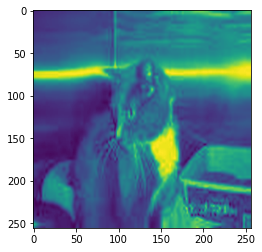

In [ ]:
image_index=1
label = train_data[image_index][1]
class_name=train_data[image_index][2]
print ("label:", label)
print ("class name:", class_name)
image = plt.imshow(train_data[image_index][0])

label: [0 1]
class name: notcats


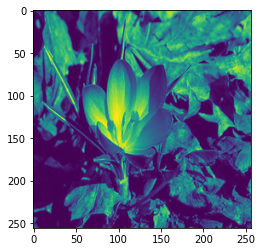

In [ ]:
image_index=200
label = train_data[image_index][1]
class_name=train_data[image_index][2]
print ("label:", label)
print ("class name:", class_name)
image = plt.imshow(train_data[image_index][0])

In [ ]:
IMAGE_DIRECTORY = PROJECT_PATH+'dataset/test_set'

t0=datetime.datetime.now()
test_data = load_data(IMAGE_DIRECTORY,number_of_images=100,shuffle_data=True)
t1=datetime.datetime.now()
print("time to load data", (t1-t0))

testX = np.array([i[0] for i in test_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
testY = np.array([i[1] for i in test_data])


print(testX.shape)
print(testY.shape)

Loading images...
Loading notcats
Loading cats
we loaded  200 images in the training dataset
time to load data 0:02:28.765773
(200, 256, 256, 1)
(200, 2)


# Training with a convolutional neural network model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
print('creating model')
model = create_cnn_model()
opt=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

creating model


In [ ]:
BATCH_SIZE=64
EPOCHS=100


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                        

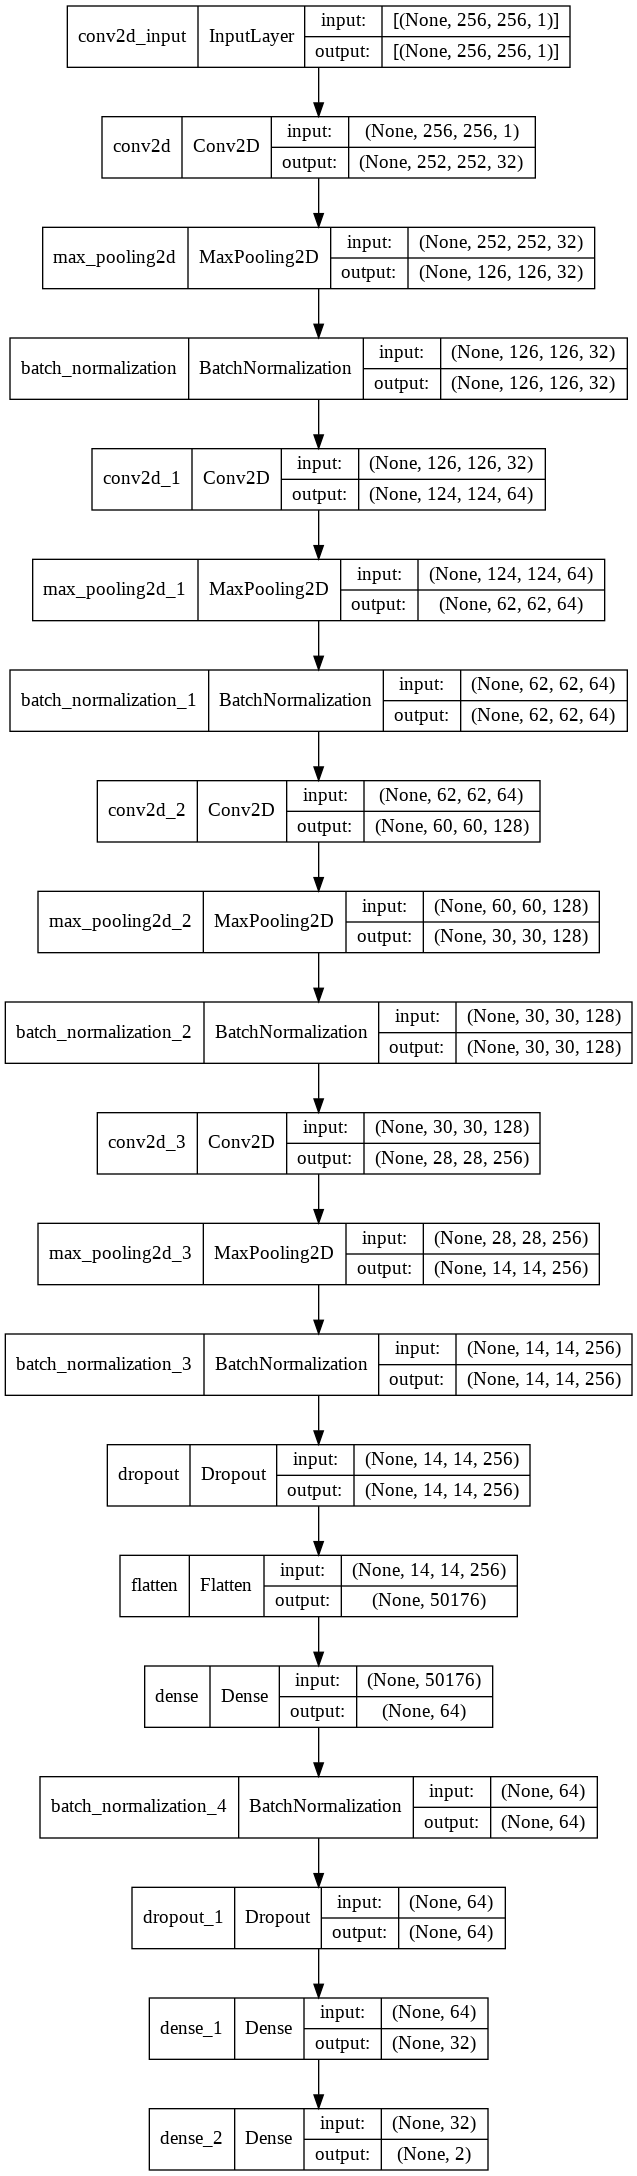

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
print('training model')
t0=datetime.datetime.now()
history=model.fit(trainX, trainY, 
          batch_size=BATCH_SIZE, 
          epochs=EPOCHS, 
          verbose=1,
          validation_data=(testX, testY)
         )
t1=datetime.datetime.now()
print("time to load data", (t1-t0))


training model
Epoch 1/100
7/7 [==============================] - 37s 506ms/step - loss: 1.1426 - accuracy: 0.5250 - val_loss: 1.8651 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 2s 271ms/step - loss: 0.9891 - accuracy: 0.5550 - val_loss: 1.7632 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 2s 272ms/step - loss: 0.9436 - accuracy: 0.5825 - val_loss: 1.8123 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 2s 272ms/step - loss: 0.8260 - accuracy: 0.6125 - val_loss: 1.4030 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 2s 271ms/step - loss: 0.8075 - accuracy: 0.6300 - val_loss: 1.1406 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 2s 273ms/step - loss: 0.7858 - accuracy: 0.6375 - val_loss: 1.0353 - val_accuracy: 0.5050
Epoch 7/100
7/7 [==============================] - 2s 274ms/step - loss: 0.7809 - accuracy: 0.6025 - val_loss: 0.9803 - val_accuracy: 0.51

In [ ]:
model.save(PROJECT_PATH+"model_cnn.h5")
PROJECT_PATH

'/content/drive/MyDrive/cat-dog/'

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_history(history):

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

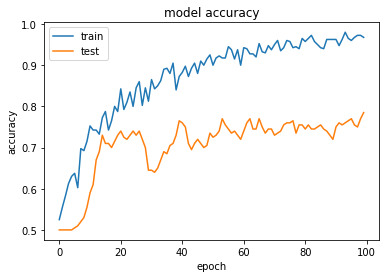

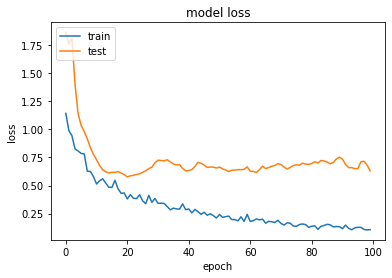

In [ ]:
plot_history(history)

# Training with a fully-connected neural network model

In [ ]:
print('creating model')
model_nn = create_model()
model_nn.compile(loss='categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])

#

creating model


In [ ]:
print('training model')
t1=datetime.datetime.now()
history_nn=model_nn.fit(trainX, trainY, 
             batch_size=50, 
             epochs=100, 
             verbose=1,
             validation_data=(testX, testY))
t1=datetime.datetime.now()
print("time to load data", (t1-t0))

training model
Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 1318.9749 - accuracy: 0.4700 - val_loss: 218.3467 - val_accuracy: 0.5200
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 238.1823 - accuracy: 0.5250 - val_loss: 299.9377 - val_accuracy: 0.5050
Epoch 3/100
8/8 [==============================] - 0s 22ms/step - loss: 502.6226 - accuracy: 0.4875 - val_loss: 367.7908 - val_accuracy: 0.5100
Epoch 4/100
8/8 [==============================] - 0s 23ms/step - loss: 227.8937 - accuracy: 0.6075 - val_loss: 302.0019 - val_accuracy: 0.5200
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 217.0896 - accuracy: 0.5875 - val_loss: 98.6207 - val_accuracy: 0.6450
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 292.4583 - accuracy: 0.5600 - val_loss: 282.5280 - val_accuracy: 0.5300
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 334.1439 - accuracy: 0.5250 - val_loss: 320.6699 

In [ ]:
model_nn.save(PROJECT_PATH+"model_nn.h5")

In [ ]:
history_nn.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

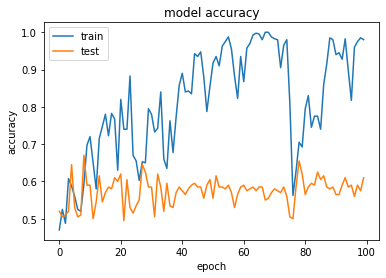

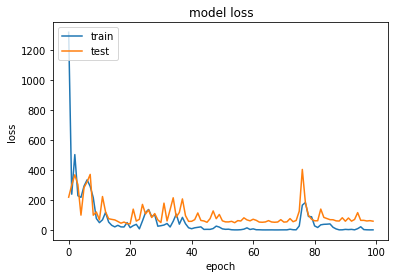

In [ ]:
plot_history(history_nn)